# Credit Card Fraud Detection with a neural network, tensorflow and SMOTE

### First install  the required python plugins

In [ ]:
pip install pandas scikit-learn tensorflow matplotlib seaborn requests kaggle imbalanced-learn

### Import the functions

In [6]:
import os
import json
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from sklearn.model_selection import train_test_split
import requests
import sys
from imblearn.over_sampling import SMOTE
import importlib.util
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd  # For data manipulation and analysis
from sklearn.preprocessing import StandardScaler  # For standardizing numerical features
from sklearn.model_selection import train_test_split, GridSearchCV  # To split the dataset and perform hyperparameter tuning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve   # For evaluation metrics
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For creating advanced visualizations
import requests  # To download files from the internet

### The Code

Select an option:
1. Download the files from GitHub (Works for every compiler)
2. Download the files (Local)
3. Select the files (Local)
4. Exit
Option 3: Select the files (Local)
Loaded file: C:/Users/Ghaith/Documents/GitHub/UP2089173-Credit-Card-Fraud-Detection/py/Q1_folder/creditcard.csv
Epoch 1/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 4s 793us/step - accuracy: 0.9505 - loss: 0.1217 - val_accuracy: 0.9959 - val_loss: 0.0172
Epoch 2/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9983 - val_loss: 0.0085
Epoch 3/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 4s 780us/step - accuracy: 0.9963 - loss: 0.0131 - val_accuracy: 0.9988 - val_loss: 0.0065
Epoch 4/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 4s 781us/step - accuracy: 0.9971 - loss: 0.0104 - val_accuracy: 0.9989 - val_loss: 0.0055
Epoch 5/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 4s 782us/step - accuracy: 0.9974 - loss: 0.0097 - val_accuracy: 0.9991 - val_loss: 0.0045
Epoch 6/10
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 4s 780u

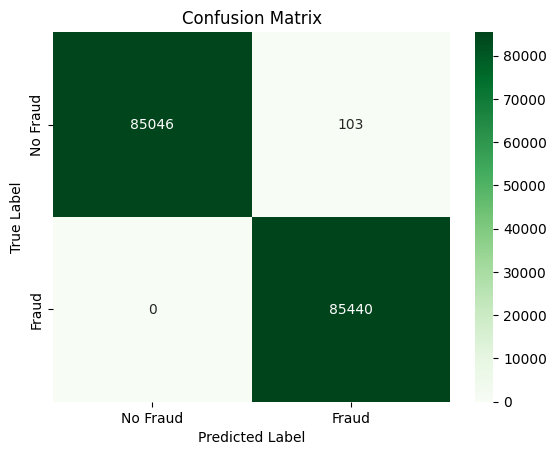

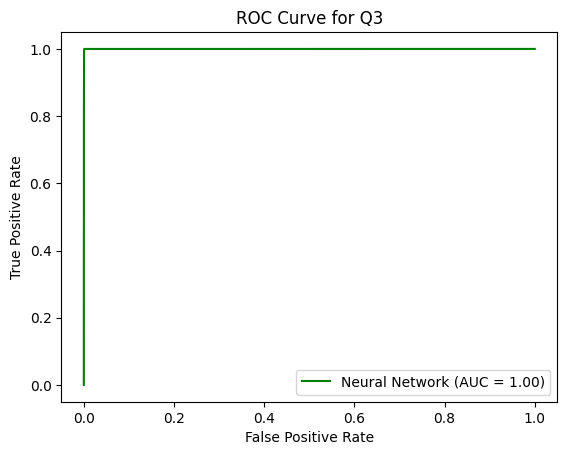

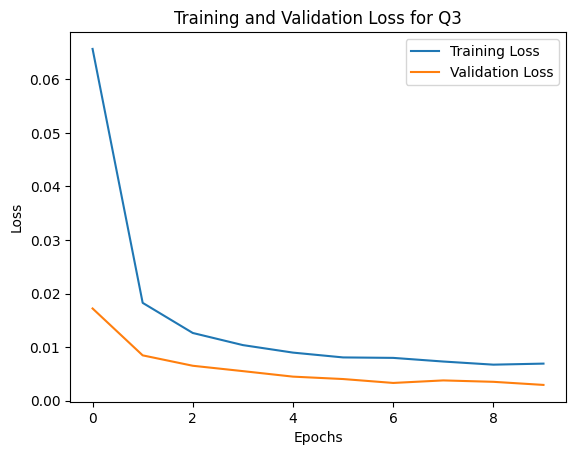

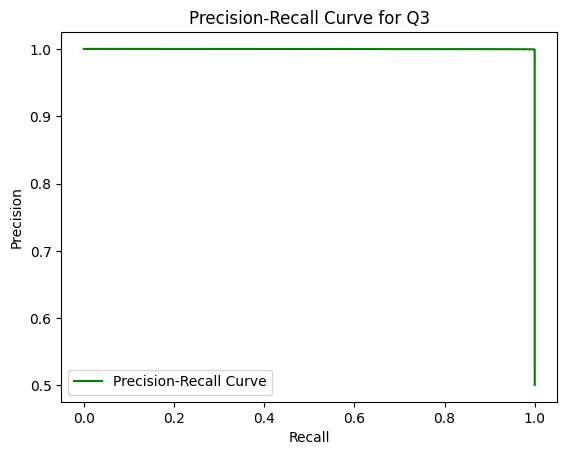

In [7]:
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
while True:
    # Display options
    print("Select an option:")
    print("1. Download the files from GitHub (Works for every compiler)")
    print("2. Download the files (Local)")
    print("3. Select the files (Local)")
    print("4. Exit")

    # Get user input
    choice = input("Enter your choice (1/2/3/4): ")

    if choice == '1':
        print("Option 1: Download the files from GitHub (Colab)")
        # Add logic for downloading from GitHub here
        url = "https://raw.githubusercontent.com/ghaithmusa0502/UP2089173-Credit-Card-Fraud-Detection/main/py/functions.py"
        #Download the functions.py file from the URL and save it locally
        response = requests.get(url)
        with open("functions.py", "w") as file:
          file.write(response.text)
        # Prompt the user to upload a .py file
        import functions
        functions.download_kaggle_dataset_colab()
        break       
    elif choice == '2':
        print("Option 2: Download the files (Local)")
        url = "https://raw.githubusercontent.com/ghaithmusa0502/UP2089173-Credit-Card-Fraud-Detection/main/py/functions.py"
        #Download the functions.py file from the URL and save it locally
        response = requests.get(url)
        with open("functions.py", "w") as file:
            file.write(response.text)
        root = tk.Tk()
        root.withdraw()
        import functions
        functions.Download_and_Extract_Kaggle_Dataset_Local()
        break

    elif choice == '3':
        print("Option 3: Select the files (Local)")
        root = tk.Tk()
        root.withdraw()
        filename = filedialog.askopenfilename(title="Select a Python file", filetypes=[("Python Files", "*.py")])
        # Get the directory of the selected file
        file_dir = os.path.dirname(os.path.abspath(filename))
        # Check if the file directory is already in sys.path
        if file_dir not in sys.path:
            sys.path.append(file_dir)
        # Use importlib to load the module dynamically
        module_name = os.path.basename(filename).replace(".py", "")
        spec = importlib.util.spec_from_file_location(module_name, filename)
        functions = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(functions)
        import functions
        data = functions.upload_csv()
        break

    elif choice == '4':
        print("Exiting program.")
        break

    else:
        print("Invalid choice. Please select a valid option (1/2/3/4).")

# Main script for downloading the dataset and processing
# Step 3: Data Preprocessing
data = pd.read_csv("creditcard.csv")  # Load the dataset

X_resampled, y_resampled = functions.preprocess_and_resample_data(data, target_column='Class')

# Split into training and testing sets 70/30
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


# Utilises a function in the py where it builds a neural network to the size of the columns in the training data
model = functions.build_neural_network(input_shape=X_train.shape[1])
if model is None:
    print("Model creation failed.")
else:
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    # Train the neural network model using the training data
    history = model.fit(
        # Training data (features), Training data (target labels)
        X_train, y_train,
        # Validation split: Reserve 20% of the training data for validation
        # Helps monitor the model's performance on unseen data during training
        validation_split=0.2,
        # Number of epochs: Train the model for 10 full passes over the training data
        # An epoch is one complete cycle of the forward and backward pass
        epochs=10,
        # Batch size: Divide the training data into batches of 64 samples
        # Each batch is processed independently before updating the model's weights
        batch_size=64,
        # Callbacks: List of functions or utilities to be applied during training
        # `early_stopping` monitors validation performance and stops training early if it stops improving
        callbacks=[early_stopping],
        # Verbosity level: `1` prints a progress bar and training details during training
        # Use `0` for silent mode or `2` for epoch-only summaries
        verbose=1
    )

# Metrics
y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > 0.5).astype(int)

# Print the classification report to evaluate precision, recall, F1-score, and support
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Calculate and display the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc_roc:.2f}")  # A higher score indicates better performance
# Create a confusion matrix to show true positives
conf_matrix = confusion_matrix(y_test, y_pred)
true_postive_rate= (conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]))*100
print(f"Recall (True Positive Rate): {true_postive_rate:.0f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',  # Changed to 'Reds'
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 7: Visualize the Results
# Compute the false positive rate (FPR) and true positive rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot the ROC Curve
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc_roc:.2f})', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Q3')
plt.legend()
plt.show()

# Training Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Q3')
plt.legend()
plt.show()

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the Precision-Recall Curve
plt.plot(recall, precision, label='Precision-Recall Curve', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Q3')
plt.legend()
plt.show()

### Explanations behind this code 
The start of this code is very similar to Q2 and utilises many of the same functions as from the functions.py file, however the key difference is instead of using the function preprocess_data() it uses the function reprocess_and_resample_data(). The functions are both very similar in the beginning in the way they separate the Features and the target variable, and standardises the features. The difference lies in the usage of SMOTE (Synthetic Minority Oversampling Technique) to augment the dataset and address the class imbalance in dataset between the fraudulent and non-fraudulent cases, before returning the augmented data. After this the rest of the code progresses in a similar vein to Q2.

### How does data augmentation affect the performance of a neural network?

When comparing the results of these two models, the inclusion of SMOTE in Q3 provides an instant impact. SMOTE, or Synthetic Minority Over-sampling Technique, creates synthetic samples for the underrepresented minority class (fraudulent transactions). This addition leads to a much larger and more balanced dataset, while addressing the class imbalance issue that is common in fraud detection tasks. By generating additional samples for the minority class, SMOTE helps the model better understand the characteristics of fraudulent transactions, improving its ability to detect fraud.

Moreover, the use of SMOTE helps reduce the problem of overfitting. With a larger, more diverse dataset, the model is less likely to memorise the patterns in the training data and more likely to generalize to unseen data. This enhanced generalization helps the model perform better when applied to real-world scenarios, where fraudulent transactions may vary in different ways. By augmenting the dataset, SMOTE also helps the model become more robust to noisy, corrupted, or perturbed inputs, enabling it to handle a wider variety of situations effectively.

When analysing the Precision-Recall Curve, we see a distinct difference between Q2 and Q3. The curve for Q2 shows a much sharper decline as recall increases, this shows that the model in Q2 had difficulty maintaining high precision while trying to capture more positive cases (fraudulent transactions). This could suggest that the model was unable to find a balance between detecting fraudulent transactions and minimizing false positives. In contrast, Q3 showcases a more stable curve, suggests that SMOTE allowed the model to maintain precision while increasing recall, indicating better performance in detecting fraud without drastically increasing false positives.

In addition, the ROC (Receiver Operating Characteristic) Curve provides more insights into the models' performance. In Q2, the ROC curve has an AUC (Area Under Curve) of 0.98, which is already quite good, indicating that the model is effective at distinguishing between fraudulent and non-fraudulent transactions. However, the AUC for Q3 is slightly higher at 1.00, meaning that the model in Q3 achieved perfect separation between the two classes. This marginal improvement suggests that SMOTE not only helped in balancing the dataset but also enhanced the model's ability to differentiate between the two classes, leading to a better overall performance in terms of the trade-off between the true positive rate (sensitivity) and false positive rate (1-specificity).

The Confusion Matrices further support the idea that SMOTE improved the model's performance. In Q2, the model made more false positive and false negative predictions, which means it either incorrectly classified legitimate transactions as fraudulent or missed fraudulent transactions. In Q3, however, the number of these misclassifications was reduced, with fewer false positives and false negatives. This improvement is a direct consequence of the enhanced ability to detect fraud more accurately due to the larger, more balanced dataset created by SMOTE.

In conclusion, the results suggest that the use of SMOTE in Q3 significantly improved the neural network's ability to generalize and perform better on the credit card fraud detection task. The model in Q3 not only maintained better precision while increasing recall but also showed better discrimination between fraudulent and non-fraudulent transactions. These improvements indicate that data augmentation techniques like SMOTE are crucial for tackling class imbalance and improving the performance of machine learning models, particularly in tasks such as fraud detection, where the minority class is of utmost importance.


Epoch 1/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.9521 - loss: 0.1012 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 2/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 772us/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 3/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 765us/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 4/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 777us/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 5/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 6/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 7/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 772us/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 8/10
2493/2493 ━━━━━━━━━━━━━━━━━━━━ 2s 784us/step - accuracy: 0.9995 -

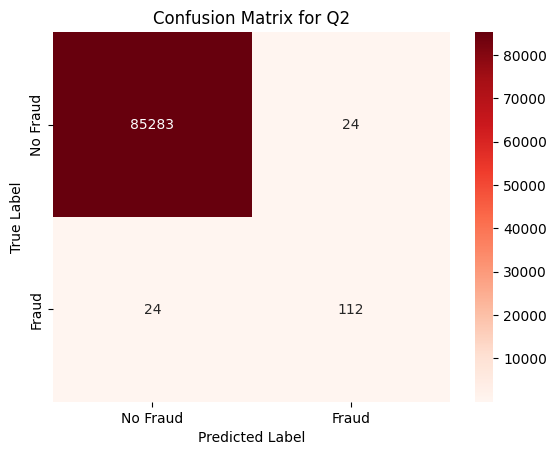

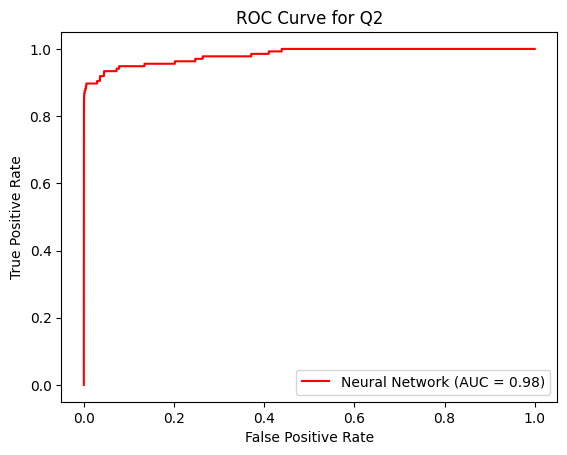

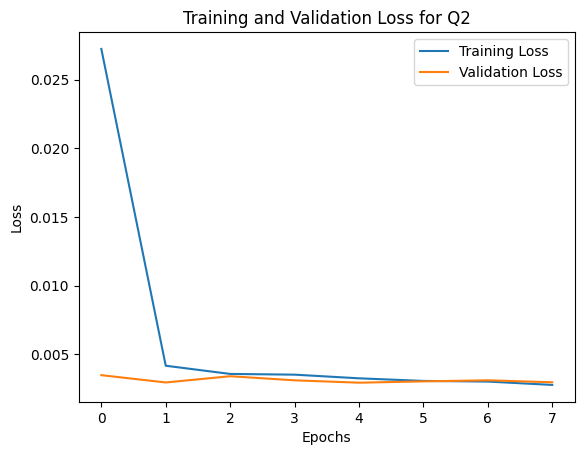

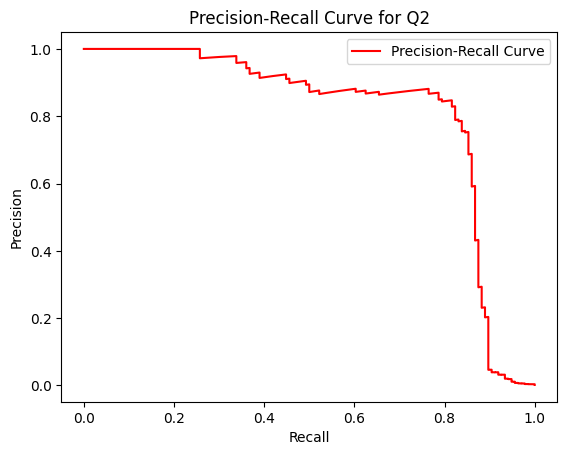

In [8]:
X_scaled, y = functions.preprocess_data(data, target_column='Class') 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = functions.build_neural_network(input_shape=X_train.shape[1])
if model is None:
    print("Model creation failed.")
else:
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=10,
        batch_size=64,

        callbacks=[early_stopping],
        verbose=1
    )

y_proba = model.predict(X_test).flatten()
y_pred = (y_proba > 0.5).astype(int)

auc_roc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
true_postive_rate= (conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]))*100

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',  # Changed to 'Reds'
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Confusion Matrix for Q2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc_roc:.2f})', color='red')  # Changed color to red
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Q2')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Q2')
plt.legend()
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision, label='Precision-Recall Curve', color='red')  # Changed color to red
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Q2')
plt.legend()
plt.show()